In [1]:
import taurex
import numpy as np
import matplotlib.pyplot as plt

from taurex.cache import OpacityCache,CIACache
OpacityCache().clear_cache()
path_to_cia = "./cia/hitran/"
path_to_xsec = "./xsecs/"
OpacityCache().set_opacity_path(path_to_xsec)
CIACache().set_cia_path(path_to_cia)

In [19]:
# Planete Parameters
t0 = 0.                        #time of inferior conjunction
per = 1.09141937               #orbital period
rp = 0.195                     #planet radius (in units of stellar radii)
a = 5.04                       #semi-major axis (in units of stellar radii)
inc = 83.37                    #orbital inclination (in degrees)
ecc = 0.0447                   #eccentricity
w = 272.7                      #longitude of periastron (in degrees)
T_irr = 2592.6 # Equilibrium Temperature
planet_mass = 1.465 # Mass in Jupiters
path_to_cia = "./cia/hitran/"
path_to_xsec = "./xsecs/"

parametri_pianeta = {
    't0': 0.0,                 # tempo della congiunzione inferiore
    'per': 1.09141937,         # periodo orbitale
    'rp': 0.195,               # raggio del pianeta (in unità del raggio stellare)
    'a': 5.04,                 # semiasse maggiore (in unità del raggio stellare)
    'inc': 83.37,              # inclinazione orbitale (in gradi)
    'ecc': 0.0447,             # eccentricità
    'w': 272.7,                # longitudine del periasse (in gradi)
    'T_irr': 2592.6,           # temperatura di equilibrio
    'planet_mass': 1.465       # massa del pianeta (in masse gioviane)
}



In [24]:
import json

# Randomize Abundance
H2O = np.random.uniform(1e-8,1e-2)
print(f"H2O: {H2O}")
CH4 = np.random.uniform(1e-8,1e-2)
print(f"CH4: {CH4}")
CO2 = np.random.uniform(1e-8,1e-2)
print(f"CO2: {CO2}")
CO = np.random.uniform(1e-8,1e-2)
print(f"CO: {CO}")

parametri_pianeta['H20'] = H2O
parametri_pianeta['CH4'] = CH4
parametri_pianeta['CO2'] = CO2
parametri_pianeta['CO'] = CO

star_temperature=6360
star_radius=1.657
atm_min_pressure=1e-0
atm_max_pressure=1e6

parametri_pianeta['star_temperature'] = star_temperature
parametri_pianeta['star radius'] = star_radius
parametri_pianeta['atm min pressure'] = atm_min_pressure
parametri_pianeta['atm max pressure'] = atm_max_pressure

# Salva il dizionario in un file JSON
with open('wasp12b_assignment3_taskA_parameters.json', 'w') as file:
    json.dump(parametri_pianeta, file, indent=4)


H2O: 0.003991699321690203
CH4: 0.008494964161497403
CO2: 0.006865081093789541
CO: 0.00901703619589231


In [4]:
from taurex.temperature import Guillot2010
from taurex.planet import Planet
from taurex.stellar import BlackbodyStar
from taurex.chemistry import TaurexChemistry
from taurex.model import TransmissionModel
from taurex.contributions import AbsorptionContribution
from taurex.contributions import CIAContribution
from taurex.contributions import RayleighContribution
from taurex.chemistry import ConstantGas
from taurex.binning import FluxBinner,SimpleBinner
guillot = Guillot2010(T_irr=T_irr)
planet = Planet(planet_radius=rp,planet_mass=planet_mass)
star = BlackbodyStar(temperature=6360,radius=1.657)
chemistry = TaurexChemistry()
chemistry.addGas(ConstantGas('H20',mix_ratio=H2O))
chemistry.addGas(ConstantGas('CH4',mix_ratio=CH4))
chemistry.addGas(ConstantGas('CO2',mix_ratio=CO2))
chemistry.addGas(ConstantGas('CO',mix_ratio=CO))
model = TransmissionModel(planet=planet,
                       temperature_profile=guillot,
                       chemistry=chemistry,
                       star=star,
                        atm_min_pressure=1e-0,
                       atm_max_pressure=1e6,
                       nlayers=30)
model.add_contribution(AbsorptionContribution())
model.add_contribution(CIAContribution(cia_pairs=['H2-H2','H2-He']))
model.add_contribution(RayleighContribution())

model.build()
results = model.model()
# Second cosa of results is rprs



Numba not installed, using numpy instead


In [12]:
wngrid = np.sort(10000/np.logspace(-0.4,1.1,1000))
bn = SimpleBinner(wngrid=wngrid)

bin_wn, bin_rprs,_,_  = bn.bin_model(model.model(wngrid=wngrid))

#Inizializzo matrice per salvare i risultati
matrix = np.array([bin_wn, bin_rprs, np.sqrt(bin_rprs)])
print(matrix)


#Salva la matrice su un file .dat
np.savetxt('wasp12b_assignment3_taskA_spectrum.dat', matrix)

[[7.94328235e+02 7.97079246e+02 7.99839786e+02 ... 2.49457748e+04
  2.50321699e+04 2.51188643e+04]
 [1.48189596e-04 1.48183407e-04 1.48177145e-04 ... 1.46723496e-04
  1.46725833e-04 1.46728171e-04]
 [1.21733149e-02 1.21730607e-02 1.21728035e-02 ... 1.21129474e-02
  1.21130439e-02 1.21131404e-02]]


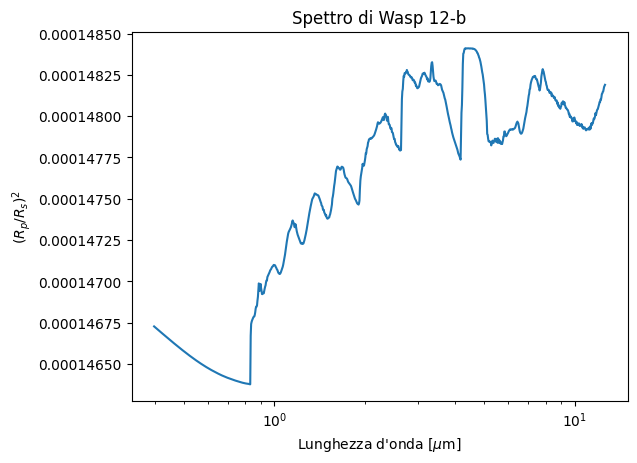

In [25]:
plt.plot(10000/bin_wn, bin_rprs)
plt.xscale('log')
plt.title("Spettro di Wasp 12-b")
plt.xlabel('Lunghezza d\'onda [$\\mu$m]')
plt.ylabel(r'$(R_p / R_s)^2$')
plt.savefig('wasp12b_assignment3_taskA_spectrum.png')
plt.show()


In [ ]:
results # Returns: wavenumber grid, native flux, optical depth, extra info(?)

(array([  199.99326855,   200.00660143,   200.01993521, ...,
        33328.88933329, 33331.11125925, 33333.33333333]),
 array([0.00014736, 0.00014744, 0.00014737, ..., 0.00014698, 0.00014698,
        0.00014698]),
 array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         1.06323579e-010, 1.05635718e-010, 1.04952102e-010],
        [1.27832558e-254, 5.12257887e-289, 4.29837112e-322, ...,
         5.51930577e-007, 5.49663106e-007, 5.47404269e-007],
        [2.44044129e-128, 1.24954540e-146, 4.74700752e-163, ...,
         1.10717683e-004, 1.10427979e-004, 1.10138946e-004],
        ...,
        [9.99081144e-001, 9.98088179e-001, 9.99449508e-001, ...,
         9.99914687e-001, 9.99914662e-001, 9.99914637e-001],
        [9.99505944e-001, 9.98915971e-001, 9.99694518e-001, ...,
         9.99952653e-001, 9.99952640e-001, 9.99952626e-001],
        [9.99792495e-001, 9.99524877e-001, 9.99868352e-001, ...,
         9.99979559e-001, 9.99979553e-001, 9.99979547e-001]]),
 None)

In [15]:
model.fittingParameters.values()
model.fitting_parameters()
# TROVARE IL MODO DI SALVARLI SU FILE

{}